# Datos Financieros Agrícolas + IA para Toma de Decisiones

Este cuaderno integra **datos financieros en tiempo real** con **análisis de inteligencia artificial** para crear herramientas prácticas de toma de decisiones comerciales en el sector agropecuario argentino.

## ¿Por qué datos financieros en lugar de web scraping?

**El problema del web scraping tradicional:**
- Las páginas web cambian constantemente, rompiendo el código
- La información suele estar desorganizada y require mucho procesamiento
- No proporciona datos estructurados para análisis sistemáticos
- Es lento y consume muchos recursos

**La ventaja de las APIs financieras:**
- Datos estructurados y confiables
- Actualizaciones en tiempo real
- Información histórica para análisis de tendencias
- Integración directa con herramientas de análisis

## Aplicaciones prácticas para productores:
- **Decisiones comerciales**: Determinar el momento óptimo para vender la cosecha
- **Análisis de márgenes**: Evaluar la rentabilidad de diferentes cultivos
- **Detección de oportunidades**: Identificar momentos favorables del mercado
- **Gestión de riesgos**: Estrategias de cobertura y diversificación
- **Planificación de siembras**: Proyecciones de rentabilidad por cultivo

## Configuración del Entorno de Trabajo

### Instalación de librerías especializadas

Primero instalamos las herramientas necesarias para trabajar con datos financieros y análisis de IA:

In [1]:
!pip install google-genai

  Using cached google_genai-1.33.0-py3-none-any.whl.metadata (43 kB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
Using cached google_genai-1.33.0-py3-none-any.whl (241 kB)
Using cached google_auth-2.40.3-py2.py3-none-any.whl (216 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached rsa-4.9.1-py3-none-any.whl (34 kB)
Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)

   ---------------------------------------- 0/7 [tenacity]
   ----- ---------------------------------- 1/7 [pyasn1]
   ----- ---------------------------------- 1/7 [pyasn1]
   ----- ---------------------------------- 1/7 [pyasn1]
   ----- ---------------

In [ ]:
# Instalación de librerías especializadas
%pip install -U -q google-genai yfinance pandas matplotlib seaborn requests

In [5]:
!pip install python-dotenv

In [6]:

# Importación de librerías para análisis financiero
import yfinance as yf          # API para datos financieros de Yahoo Finance
import pandas as pd            # Manipulación y análisis de datos
import matplotlib.pyplot as plt # Visualización de gráficos
import seaborn as sns          # Visualización estadística avanzada
import requests               # Llamadas HTTP a APIs
import json                   # Procesamiento de datos JSON
from datetime import datetime, timedelta  # Manejo de fechas
from IPython.display import display, Markdown  # Visualización en Jupyter
import warnings
warnings.filterwarnings('ignore')  # Suprimir advertencias menores
from dotenv import load_dotenv  # Cargar variables de entorno
import os                       # Manejo de variables de entorno

load_dotenv()  # Cargar variables de entorno desde .env

print("Librerías financieras instaladas correctamente")
print("yfinance: Acceso a cotizaciones bursátiles")
print("pandas: Análisis de datos estructurados")
print("matplotlib: Creación de gráficos")
print("seaborn: Visualizaciones estadísticas")

Librerías financieras instaladas correctamente
yfinance: Acceso a cotizaciones bursátiles
pandas: Análisis de datos estructurados
matplotlib: Creación de gráficos
seaborn: Visualizaciones estadísticas


### Configuración de Google Gemini API

Gemini nos permitirá analizar los datos financieros y generar recomendaciones comerciales inteligentes. Esta integración demuestra cómo combinar datos cuantitativos con análisis cualitativo de IA.

In [10]:
# Configuración de Google Gemini para análisis financiero agrícola
#from google.colab import userdata
import os
from google import genai

# Configurar autenticación de API
# En Google Colab, las claves se almacenan de forma segura
GOOGLE_API_KEY = None
try:
    # Intento 1: Obtener clave desde Colab secrets
    GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
except:
    # Intento 2: Obtener desde variables de entorno (desarrollo local)
    GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

# Validar que tenemos acceso a la API
if not GOOGLE_API_KEY:
    raise ValueError('GOOGLE_API_KEY no encontrada. Configura tu clave de Google AI Studio')

# Inicializar cliente de Gemini
cliente_gemini = genai.Client(api_key=GOOGLE_API_KEY)
MODEL_ID = "gemini-2.0-flash"  # Modelo optimizado para respuestas rápidas

print("Google Gemini API configurada correctamente")
print(f"Modelo seleccionado: {MODEL_ID}")
print("Función: Análisis inteligente de datos financieros agrícolas")

# Función auxiliar para consultas a Gemini
def analizar_con_gemini(prompt):
    """
    Función para enviar consultas a Google Gemini y obtener análisis.

    Parámetros:
    prompt (str): La consulta o instrucción para el modelo de IA

    Retorna:
    str: La respuesta generada por Gemini
    """
    response = cliente_gemini.models.generate_content(
        model=MODEL_ID,
        contents=[prompt]
    )
    return response.text

print("Función analizar_con_gemini() lista para usar")

Google Gemini API configurada correctamente
Modelo seleccionado: gemini-2.0-flash
Función: Análisis inteligente de datos financieros agrícolas
Función analizar_con_gemini() lista para usar


## Obtención de Cotizaciones de Commodities Agrícolas

### Definición de los mercados a monitorear

Seleccionamos los principales commodities que impactan en la rentabilidad del agro argentino. Usamos los símbolos estándar de Yahoo Finance para acceder a los mercados internacionales.

In [12]:
# Definición de commodities agrícolas principales y sus símbolos de mercado
commodities_agricolas = {
    'Soja': 'ZS=F',      # Soybean Futures - Chicago Board of Trade (CBOT)
    'Maíz': 'ZC=F',     # Corn Futures - CBOT
    'Trigo': 'ZW=F',    # Wheat Futures - CBOT
    'Dólar': 'USDARS=X' # Tipo de cambio USD/ARS
}

def obtener_cotizaciones_actuales():
    """
    Función para obtener las cotizaciones actuales de los commodities agrícolas.

    Esta función:
    1. Conecta con la API de Yahoo Finance
    2. Obtiene los precios actuales y del día anterior
    3. Calcula la variación porcentual diaria
    4. Maneja errores de conectividad o datos faltantes

    Retorna:
    dict: Diccionario con las cotizaciones y variaciones de cada commodity
    """
    cotizaciones = {}

    # Iteramos sobre cada commodity definido
    for nombre, simbolo in commodities_agricolas.items():
        try:
            print(f"Obteniendo datos para {nombre} ({simbolo})...")

            # Crear objeto ticker de Yahoo Finance
            ticker = yf.Ticker(simbolo)

            # Obtener información general del instrumento
            info = ticker.info

            # Obtener datos históricos del último día de trading
            hist = ticker.history(period='5d')

            if not hist.empty:
                # Extraer precios relevantes
                precio_actual = hist['Close'].iloc[-1]  # Precio de cierre
                precio_anterior = hist['Open'].iloc[-1] # Precio de apertura

                # Calcular variación porcentual
                variacion = ((precio_actual - precio_anterior) / precio_anterior) * 100

                # Almacenar resultados
                cotizaciones[nombre] = {
                    'precio': precio_actual,
                    'variacion': variacion,
                    'simbolo': simbolo
                }
                print(f"✓ {nombre}: ${precio_actual:.2f} ({variacion:+.2f}%)")
            else:
                print(f"⚠ Warning: No se encontraron datos para {nombre}")

        except Exception as e:
            print(f"✗ Error obteniendo {nombre}: {str(e)}")
            # Continuamos con el siguiente commodity aunque uno falle

    return cotizaciones

# Ejecutar la función para obtener cotizaciones actuales
print("Iniciando descarga de cotizaciones...")
cotizaciones_actuales = obtener_cotizaciones_actuales()

# Mostrar resultados formateados
print("\n" + "=" * 50)
print("COTIZACIONES ACTUALES - COMMODITIES AGRÍCOLAS")
print("=" * 50)

for commodity, datos in cotizaciones_actuales.items():
    precio = datos['precio']
    variacion = datos['variacion']

    # Determinar símbolo de tendencia
    if variacion > 0:
        tendencia = "↗ (Subida)"
    elif variacion < 0:
        tendencia = "↘ (Bajada)"
    else:
        tendencia = "→ (Sin cambio)"

    # Formatear salida según el tipo de commodity
    if commodity == 'Dólar':
        print(f"{commodity:8}: ${precio:8.2f} ARS {tendencia} ({variacion:+5.2f}%)")
    else:
        print(f"{commodity:8}: ${precio:8.2f} USD/bu {tendencia} ({variacion:+5.2f}%)")

print(f"\nÚltima actualización: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\nNotas:")
print("- Precios en dólares por bushel (bu) para granos")
print("- Tipo de cambio en pesos argentinos por dólar")
print("- Variación calculada respecto a la apertura del día")

Iniciando descarga de cotizaciones...
Obteniendo datos para Soja (ZS=F)...
✓ Soja: $1034.25 (+0.02%)
Obteniendo datos para Maíz (ZC=F)...
✓ Maíz: $421.00 (+0.06%)
Obteniendo datos para Trigo (ZW=F)...
✓ Trigo: $523.50 (-0.10%)
Obteniendo datos para Dólar (USDARS=X)...
✓ Dólar: $1415.00 (+0.00%)

COTIZACIONES ACTUALES - COMMODITIES AGRÍCOLAS
Soja    : $ 1034.25 USD/bu ↗ (Subida) (+0.02%)
Maíz    : $  421.00 USD/bu ↗ (Subida) (+0.06%)
Trigo   : $  523.50 USD/bu ↘ (Bajada) (-0.10%)
Dólar   : $ 1415.00 ARS → (Sin cambio) (+0.00%)

Última actualización: 2025-09-08 21:22:04

Notas:
- Precios en dólares por bushel (bu) para granos
- Tipo de cambio en pesos argentinos por dólar
- Variación calculada respecto a la apertura del día


## Análisis de Tendencias Históricas

### Importancia del contexto histórico

Para tomar decisiones comerciales informadas, es crucial entender no solo el precio actual, sino también:
- **Tendencia a largo plazo**: ¿Los precios van en alza o baja?
- **Volatilidad**: ¿Qué tan inestables son los precios?
- **Niveles históricos**: ¿El precio actual es alto o bajo comparado con el pasado?
- **Patrones estacionales**: ¿Hay épocas del año más favorables para vender?

In [13]:
# Obtención de datos históricos para análisis de tendencias
periodo_analisis = '6mo'  # Analizamos los últimos 6 meses
datos_historicos = {}

print(f"Descargando datos históricos ({periodo_analisis})...")

# Obtener datos históricos para cada commodity
for nombre, simbolo in commodities_agricolas.items():
    try:
        print(f"Procesando {nombre}...")
        ticker = yf.Ticker(simbolo)

        # Obtener datos históricos
        # period puede ser: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
        hist = ticker.history(period=periodo_analisis)

        if not hist.empty:
            # Guardamos solo los precios de cierre para el análisis
            datos_historicos[nombre] = hist['Close']
            print(f"✓ {nombre}: {len(hist)} datos históricos obtenidos")
        else:
            print(f"⚠ {nombre}: Sin datos históricos disponibles")

    except Exception as e:
        print(f"✗ Error con {nombre}: {e}")

print(f"\nDatos históricos obtenidos para {len(datos_historicos)} commodities")

Descargando datos históricos (6mo)...
Procesando Soja...
✓ Soja: 126 datos históricos obtenidos
Procesando Maíz...
✓ Maíz: 126 datos históricos obtenidos
Procesando Trigo...
✓ Trigo: 126 datos históricos obtenidos
Procesando Dólar...
✓ Dólar: 130 datos históricos obtenidos

Datos históricos obtenidos para 4 commodities


### Visualización de tendencias

Creamos gráficos que nos permiten visualizar rápidamente:
1. **Evolución temporal** de cada precio
2. **Líneas de tendencia** para identificar la dirección general
3. **Comparación visual** entre diferentes commodities

Generando gráficos de tendencias...


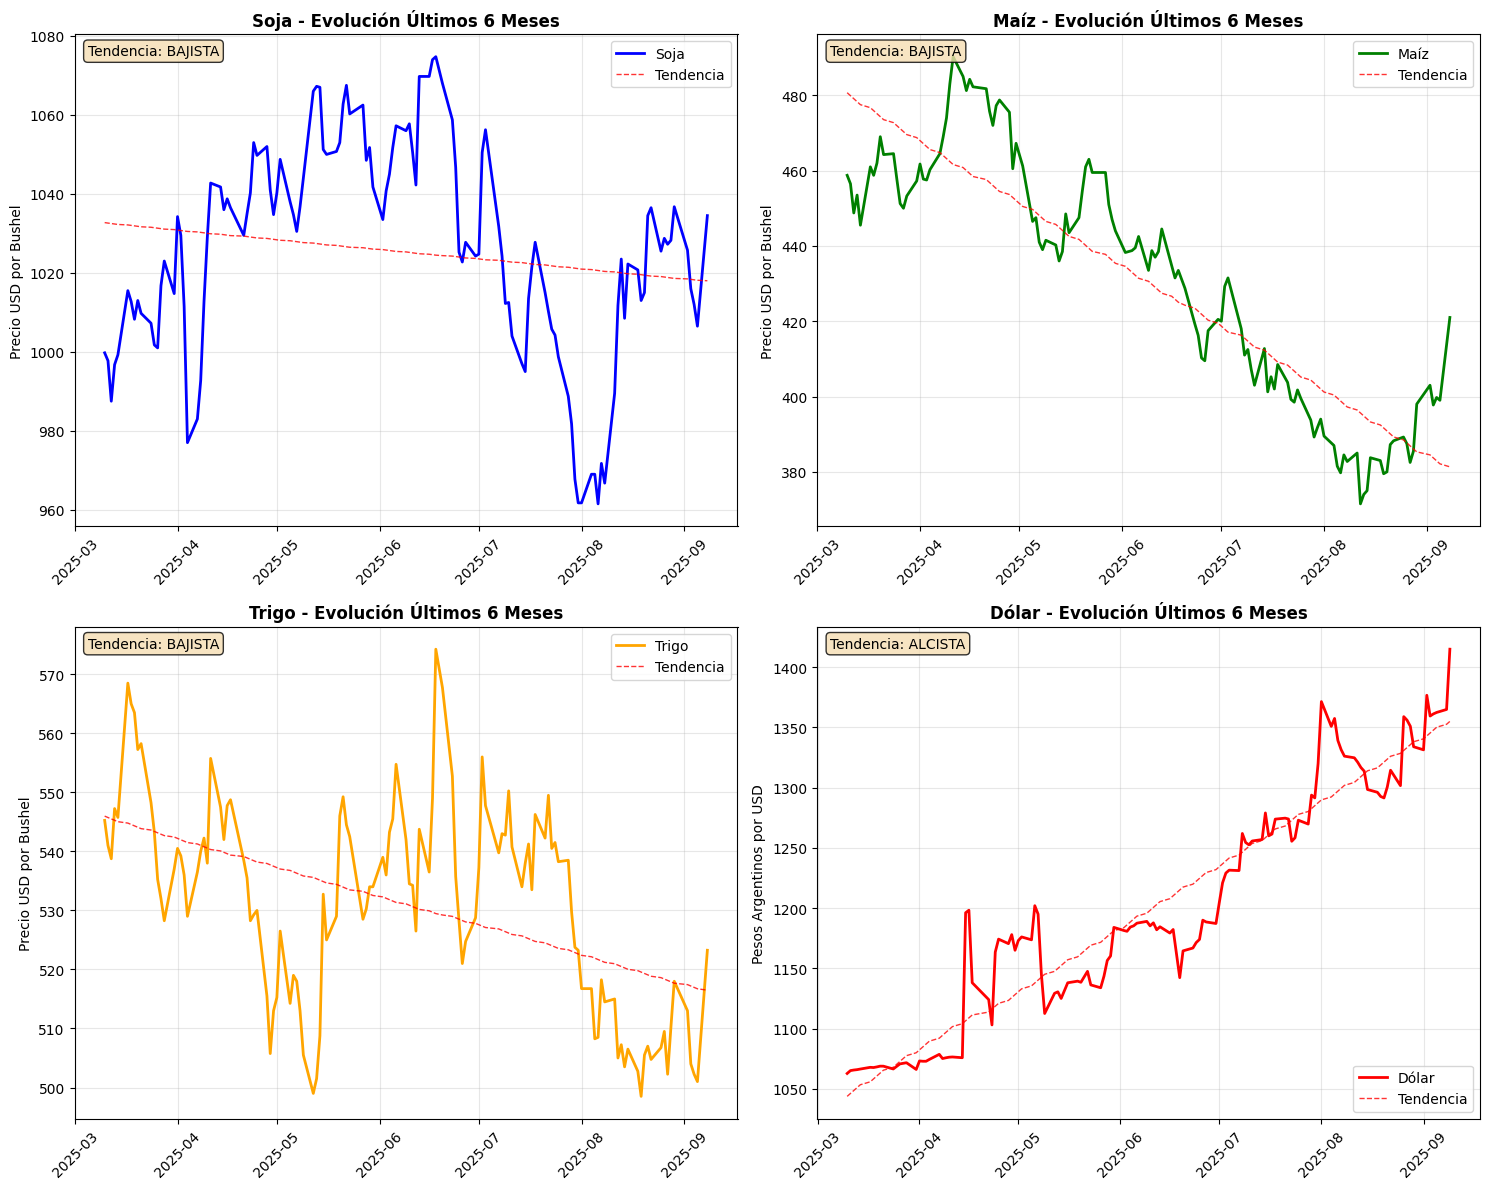

Gráficos generados exitosamente

Interpretación:
- Línea azul/verde/naranja/roja: Precio histórico
- Línea roja punteada: Línea de tendencia
- Pendiente ascendente: Tendencia alcista (precios subiendo)
- Pendiente descendente: Tendencia bajista (precios bajando)


In [14]:
# Crear visualización de tendencias históricas
import numpy as np  # Importamos numpy para cálculos de línea de tendencia

if datos_historicos:
    print("Generando gráficos de tendencias...")

    # Configurar el layout de subgráficos (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()  # Convertir matriz 2x2 en array 1D para fácil iteración

    # Colores para cada gráfico
    colores = ['blue', 'green', 'orange', 'red']

    for i, (commodity, precios) in enumerate(datos_historicos.items()):
        if i < len(axes):  # Verificar que no excedamos el número de subgráficos
            # Graficar la serie de precios
            axes[i].plot(precios.index, precios.values,
                        color=colores[i], linewidth=2, label=commodity)

            # Configurar títulos y etiquetas
            axes[i].set_title(f'{commodity} - Evolución Últimos 6 Meses',
                            fontsize=12, fontweight='bold')

            # Etiqueta del eje Y según el tipo de commodity
            if commodity == 'Dólar':
                axes[i].set_ylabel('Pesos Argentinos por USD')
            else:
                axes[i].set_ylabel('Precio USD por Bushel')

            # Configurar grilla para mejor lectura
            axes[i].grid(True, alpha=0.3)
            axes[i].tick_params(axis='x', rotation=45)  # Rotar fechas 45°

            # Calcular y agregar línea de tendencia
            # Convertimos las fechas a números para el cálculo de regresión lineal
            x_numeric = range(len(precios))
            # Calcular coeficientes de regresión lineal (pendiente e intercepto)
            coeficientes = np.polyfit(x_numeric, precios.values, 1)
            # Crear función polinomial de grado 1 (línea recta)
            linea_tendencia = np.poly1d(coeficientes)
            # Graficar línea de tendencia
            axes[i].plot(precios.index, linea_tendencia(x_numeric),
                        "r--", alpha=0.8, linewidth=1, label='Tendencia')

            # Agregar leyenda
            axes[i].legend()

            # Interpretar la pendiente de la tendencia
            pendiente = coeficientes[0]
            if pendiente > 0:
                tendencia_texto = "Tendencia: ALCISTA"
            elif pendiente < 0:
                tendencia_texto = "Tendencia: BAJISTA"
            else:
                tendencia_texto = "Tendencia: LATERAL"

            # Agregar texto explicativo
            axes[i].text(0.02, 0.98, tendencia_texto,
                        transform=axes[i].transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Ajustar espaciado entre subgráficos
    plt.tight_layout()
    plt.show()

    print("Gráficos generados exitosamente")
    print("\nInterpretación:")
    print("- Línea azul/verde/naranja/roja: Precio histórico")
    print("- Línea roja punteada: Línea de tendencia")
    print("- Pendiente ascendente: Tendencia alcista (precios subiendo)")
    print("- Pendiente descendente: Tendencia bajista (precios bajando)")
else:
    print("No se pudieron generar gráficos - datos históricos no disponibles")

### Análisis estadístico de precios

Calculamos métricas estadísticas clave para entender mejor la posición actual de cada commodity:

- **Percentil**: Indica qué porcentaje del tiempo histórico el precio actual es mayor
- **Volatilidad**: Mide la variabilidad de los precios (riesgo)
- **Máximos y mínimos**: Referencias para evaluar oportunidades

In [ ]:
# Análisis estadístico detallado de los precios
if datos_historicos:
    resumen_estadistico = {}

    print("Calculando métricas estadísticas...")

    for commodity, precios in datos_historicos.items():
        # Métricas básicas
        precio_actual = precios.iloc[-1]     # Último precio disponible
        precio_maximo = precios.max()        # Precio máximo del período
        precio_minimo = precios.min()        # Precio mínimo del período
        precio_promedio = precios.mean()     # Precio promedio

        # Métricas de volatilidad
        volatilidad = precios.std()          # Desviación estándar

        # Calcular percentil actual
        # Esto nos dice qué porcentaje del tiempo histórico el precio fue menor al actual
        percentil = (precios <= precio_actual).mean() * 100

        # Calcular retorno total del período
        retorno_total = ((precio_actual - precios.iloc[0]) / precios.iloc[0]) * 100

        # Almacenar todas las métricas
        resumen_estadistico[commodity] = {
            'actual': precio_actual,
            'máximo_6m': precio_maximo,
            'mínimo_6m': precio_minimo,
            'promedio_6m': precio_promedio,
            'volatilidad': volatilidad,
            'percentil': percentil,
            'retorno_total': retorno_total
        }

    # Mostrar resumen estadístico detallado
    print("\n" + "=" * 60)
    print("ANÁLISIS ESTADÍSTICO DETALLADO (ÚLTIMOS 6 MESES)")
    print("=" * 60)

    for commodity, stats in resumen_estadistico.items():
        print(f"\n{commodity.upper()}:")
        print(f"  Precio actual: ${stats['actual']:.2f}")
        print(f"  Rango histórico: ${stats['mínimo_6m']:.2f} - ${stats['máximo_6m']:.2f}")
        print(f"  Precio promedio: ${stats['promedio_6m']:.2f}")
        print(f"  Volatilidad (desv. std): ${stats['volatilidad']:.2f}")
        print(f"  Percentil actual: {stats['percentil']:.1f}%")
        print(f"  Retorno del período: {stats['retorno_total']:+.1f}%")

        # Interpretación del percentil para decisiones comerciales
        if stats['percentil'] > 75:
            evaluacion = "PRECIO ALTO - Favorable para venta"
            color = "🔴"
        elif stats['percentil'] < 25:
            evaluacion = "PRECIO BAJO - Considerar retención o compra"
            color = "🟢"
        else:
            evaluacion = "PRECIO MEDIO - Evaluar estrategia específica"
            color = "🟡"

        print(f"  Evaluación comercial: {color} {evaluacion}")

        # Análisis de volatilidad
        coef_variacion = (stats['volatilidad'] / stats['promedio_6m']) * 100
        if coef_variacion > 15:
            riesgo = "ALTA volatilidad - Mayor riesgo/oportunidad"
        elif coef_variacion > 8:
            riesgo = "MEDIA volatilidad - Riesgo moderado"
        else:
            riesgo = "BAJA volatilidad - Precio más estable"

        print(f"  Análisis de riesgo: {riesgo} (CV: {coef_variacion:.1f}%)")

    print("\n" + "=" * 60)
    print("INTERPRETACIÓN DE MÉTRICAS:")
    print("- Percentil 90-100%: Precio cerca de máximos históricos")
    print("- Percentil 0-10%: Precio cerca de mínimos históricos")
    print("- Coeficiente de Variación (CV): Volatilidad relativa al precio promedio")
    print("- Retorno del período: Ganancia/pérdida desde el inicio del análisis")
else:
    print("No se pueden calcular estadísticas sin datos históricos")

## Integración con Inteligencia Artificial: Análisis Comercial

### ¿Por qué usar IA para análisis financiero?

La inteligencia artificial nos permite:
1. **Procesar múltiples variables simultáneamente**
2. **Identificar patrones complejos** que podrían pasar desapercibidos
3. **Generar recomendaciones contextualizadas** para el mercado argentino
4. **Traducir datos numéricos** en estrategias comerciales claras
5. **Considerar factores cualitativos** junto con los cuantitativos

In [ ]:
# Preparación del contexto financiero para análisis con IA
if cotizaciones_actuales and datos_historicos:
    print("Preparando contexto financiero para análisis con Gemini...")

    # Construir un resumen estructurado de la información financiera
    contexto_financiero = """ANÁLISIS DE MERCADO - COMMODITIES AGRÍCOLAS ARGENTINOS

    COTIZACIONES ACTUALES (con variación diaria):
    """

    # Agregar cotizaciones actuales
    for commodity, datos in cotizaciones_actuales.items():
        precio = datos['precio']
        variacion = datos['variacion']
        contexto_financiero += f"""
    - {commodity}: ${precio:.2f} ({variacion:+.2f}% hoy)"""

    # Agregar análisis estadístico si está disponible
    contexto_financiero += "\n\nANÁLISIS ESTADÍSTICO (ÚLTIMOS 6 MESES):"

    if 'resumen_estadistico' in locals():
        for commodity, stats in resumen_estadistico.items():
            contexto_financiero += f"""
    - {commodity}: Actual ${stats['actual']:.2f} | Promedio ${stats['promedio_6m']:.2f} | Percentil {stats['percentil']:.0f}% | Retorno {stats['retorno_total']:+.1f}%"""

    # Agregar información sobre volatilidad
    contexto_financiero += "\n\nNIVELES DE VOLATILIDAD:"
    if 'resumen_estadistico' in locals():
        for commodity, stats in resumen_estadistico.items():
            cv = (stats['volatilidad'] / stats['promedio_6m']) * 100
            contexto_financiero += f"""
    - {commodity}: Coeficiente de Variación {cv:.1f}%"""

    print("Contexto financiero preparado para análisis:")
    print(contexto_financiero[:500] + "..." if len(contexto_financiero) > 500 else contexto_financiero)
    print(f"\nLongitud total del contexto: {len(contexto_financiero)} caracteres")
else:
    print("⚠ Warning: No se puede preparar contexto sin datos de cotizaciones")

### Generación de recomendaciones comerciales con IA

Ahora enviamos todos los datos financieros a Gemini para obtener un análisis integral y recomendaciones específicas para el contexto argentino.

In [ ]:
# Generación de análisis comercial integral con Gemini
if 'contexto_financiero' in locals():
    print("Enviando datos a Gemini para análisis comercial...")

    # Construir prompt especializado para análisis comercial agrícola
    prompt_comercializacion = f"""Como especialista en comercialización agrícola argentina con 15 años de experiencia, analiza la siguiente información de mercado y genera un INFORME INTEGRAL DE OPORTUNIDADES COMERCIALES:

{contexto_financiero}

CONTEXTO ESPECÍFICO DEL MERCADO ARGENTINO:
- Estamos en plena campaña agrícola 2024/25
- Los productores argentinos manejan stocks de soja y maíz de la campaña anterior
- El tipo de cambio oficial vs. paralelo ("blue") impacta significativamente en las decisiones de liquidación
- Los costos de producción han aumentado considerablemente debido a la inflación
- Existe incertidumbre política y económica que afecta las decisiones de inversión
- Los productores necesitan equilibrar flujo de caja con maximización de ingresos

GENERA UN ANÁLISIS COMERCIAL ESTRUCTURADO QUE INCLUYA:

1. **DIAGNÓSTICO ACTUAL**: Evaluación general del momento de mercado
2. **OPORTUNIDADES INMEDIATAS**: Qué commodities presentan ventanas de venta favorables HOY
3. **ESTRATEGIA DE RETENCIÓN**: Qué productos conviene mantener en stock esperando mejores precios
4. **ANÁLISIS DE RIESGO**: Factores macro y microeconómicos que podrían afectar los precios próximamente
5. **RECOMENDACIONES POR CULTIVO**: Estrategias específicas y diferenciadas para soja, maíz y trigo
6. **TIMING COMERCIAL**: Identificar ventanas de oportunidad en los próximos 30, 60 y 90 días
7. **GESTIÓN FINANCIERA**: Recomendaciones sobre exposición al dólar y estrategias de cobertura
8. **PLAN DE ACCIÓN**: Pasos concretos que un productor debería tomar esta semana

Enfoque requerido: PRÁCTICO, ACTIONABLE y ESPECÍFICO para productores argentinos que necesitan tomar decisiones comerciales inmediatas. Evita generalidades y enfócate en recomendaciones concretas.
"""

    try:
        print("Procesando análisis con Gemini (esto puede tomar unos segundos)...")
        analisis_comercial = analizar_con_gemini(prompt_comercializacion)

        print("\n" + "=" * 70)
        print("INFORME INTEGRAL DE OPORTUNIDADES COMERCIALES")
        print("Análisis generado por: Gemini AI + Datos Yahoo Finance")
        print(f"Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
        print("=" * 70)
        display(Markdown(analisis_comercial))

    except Exception as e:
        print(f"✗ Error al generar análisis con Gemini: {e}")
        print("Verificar conectividad y configuración de API")
else:
    print("⚠ No se puede generar análisis sin contexto financiero preparado")

## Calculadora de Márgenes Agrícolas

### Importancia del análisis de márgenes

Para tomar decisiones de siembra y comercialización, es fundamental calcular:
1. **Costos de producción actualizados** por cultivo y por hectárea
2. **Ingresos proyectados** basados en precios actuales y rendimientos esperados
3. **Margen bruto** como indicador de rentabilidad
4. **Análisis de sensibilidad** ante cambios de precios

### Datos de costos de producción

Los costos incluyen todos los insumos directos necesarios para la producción:

In [ ]:
# Datos actualizados de costos de producción por hectárea (en USD) - Campaña 2024/25
# Estos valores son estimativos y deben ajustarse según región y sistema productivo

costos_produccion = {
    'Soja': {
        'semillas': 45,          # Semilla fiscalizada, densidad 35-40 kg/ha
        'fertilizantes': 120,    # MAP, Urea, KCl según análisis de suelo
        'fitosanitarios': 85,    # Herbicidas, Insecticidas, Fungicidas
        'combustible': 55,       # Gasoil para labores y transporte
        'labores': 90,           # Siembra, pulverizaciones, cosecha
        'otros': 35,             # Seguros, asesoramiento técnico, varios
        'total': 430,            # Costo total directo por hectárea
        'rendimiento_promedio': 30  # Rendimiento promedio en quintales por hectárea
    },
    'Maíz': {
        'semillas': 180,         # Híbridos, población 70,000-80,000 plantas/ha
        'fertilizantes': 280,    # Mayor requerimiento nutricional que soja
        'fitosanitarios': 95,    # Control de malezas, cogollero, etc.
        'combustible': 75,       # Mayor número de labores
        'labores': 110,          # Siembra, fertilización, pulverizaciones, cosecha
        'otros': 60,             # Seguros, secado, almacenaje adicional
        'total': 800,            # Costo total más alto por ser cultivo más intensivo
        'rendimiento_promedio': 90  # Mayor potencial de rendimiento
    },
    'Trigo': {
        'semillas': 65,          # Semilla fiscalizada, 120-140 kg/ha
        'fertilizantes': 200,    # Fertilización base + refertilización
        'fitosanitarios': 70,    # Control de malezas, enfermedades foliares
        'combustible': 50,       # Menor número de labores que maíz
        'labores': 80,           # Siembra, fertilización, pulverizaciones, cosecha
        'otros': 35,             # Seguros, asesoramiento
        'total': 500,            # Costo intermedio entre soja y maíz
        'rendimiento_promedio': 45  # Rendimiento variable según zona
    }
}

print("ESTRUCTURA DE COSTOS DE PRODUCCIÓN - CAMPAÑA 2024/25")
print("=" * 60)
print(f"{'Cultivo':<8} {'Semillas':<10} {'Fertil.':<8} {'Fitosan.':<8} {'Combust.':<8} {'Labores':<8} {'Otros':<8} {'TOTAL':<8} {'Rend.qq/ha':<10}")
print("-" * 60)

for cultivo, costos in costos_produccion.items():
    print(f"{cultivo:<8} ${costos['semillas']:<9.0f} ${costos['fertilizantes']:<7.0f} ${costos['fitosanitarios']:<7.0f} ${costos['combustible']:<7.0f} ${costos['labores']:<7.0f} ${costos['otros']:<7.0f} ${costos['total']:<7.0f} {costos['rendimiento_promedio']:<10.0f}")

print("\nNotas importantes:")
print("- Costos expresados en dólares estadounidenses por hectárea")
print("- No incluye arrendamiento ni costos de estructura")
print("- Rendimientos son promedios orientativos, varían por zona y año")
print("- Precios de insumos actualizados a noviembre 2024")

### Función de cálculo de márgenes

Esta función integra:
1. **Conversión de unidades**: De bushel (mercado internacional) a quintales (unidad argentina)
2. **Cálculo de ingresos**: Precio × Rendimiento
3. **Cálculo de márgenes**: Ingresos - Costos
4. **Conversión a pesos argentinos** usando el tipo de cambio actual

In [ ]:
# Factores de conversión de bushel a quintal
# Estos factores se basan en el peso estándar de cada commodity
conversion_bu_qq = {
    'Soja': 0.6,      # 1 bushel soja = 27.2 kg ≈ 0.6 quintales
    'Maíz': 0.56,     # 1 bushel maíz = 25.4 kg ≈ 0.56 quintales
    'Trigo': 0.6      # 1 bushel trigo = 27.2 kg ≈ 0.6 quintales
}

def calcular_margen_bruto(cultivo, precio_usd_por_bu, tipo_cambio=None):
    """
    Calcula el margen bruto para un cultivo específico basado en el precio actual.

    Esta función realiza los siguientes cálculos:
    1. Convierte el precio de bushel a quintal
    2. Calcula el ingreso bruto (precio × rendimiento)
    3. Resta los costos de producción
    4. Calcula el margen como porcentaje del ingreso
    5. Opcionalmente convierte a pesos argentinos

    Parámetros:
    cultivo (str): Nombre del cultivo ('Soja', 'Maíz', 'Trigo')
    precio_usd_por_bu (float): Precio en USD por bushel
    tipo_cambio (float, opcional): Tipo de cambio USD/ARS

    Retorna:
    dict: Diccionario con todos los cálculos de rentabilidad
    """

    # Verificar que el cultivo esté en nuestra base de datos
    if cultivo not in costos_produccion:
        print(f"✗ Error: Cultivo '{cultivo}' no encontrado en base de datos")
        return None

    # Obtener datos del cultivo
    datos_cultivo = costos_produccion[cultivo]

    # Convertir precio de bushel a quintal
    factor_conversion = conversion_bu_qq[cultivo]
    precio_usd_qq = precio_usd_por_bu / factor_conversion

    print(f"Análisis de rentabilidad para {cultivo}:")
    print(f"- Precio mercado: ${precio_usd_por_bu:.2f} USD/bu")
    print(f"- Factor conversión: {factor_conversion} qq/bu")
    print(f"- Precio equivalente: ${precio_usd_qq:.2f} USD/qq")

    # Calcular componentes financieros
    rendimiento = datos_cultivo['rendimiento_promedio']
    ingreso_bruto_usd = precio_usd_qq * rendimiento
    costo_total = datos_cultivo['total']
    margen_bruto_usd = ingreso_bruto_usd - costo_total

    # Calcular margen como porcentaje del ingreso
    if ingreso_bruto_usd > 0:
        margen_porcentaje = (margen_bruto_usd / ingreso_bruto_usd) * 100
    else:
        margen_porcentaje = 0
        print("⚠ Warning: Ingreso bruto es cero o negativo")

    # Crear diccionario con resultados
    resultado = {
        'cultivo': cultivo,
        'precio_usd_bu': precio_usd_por_bu,
        'precio_usd_qq': precio_usd_qq,
        'rendimiento': rendimiento,
        'ingreso_bruto_usd': ingreso_bruto_usd,
        'costo_total_usd': costo_total,
        'margen_bruto_usd': margen_bruto_usd,
        'margen_porcentaje': margen_porcentaje
    }

    # Si se proporciona tipo de cambio, agregar conversión a ARS
    if tipo_cambio and tipo_cambio > 0:
        resultado['tipo_cambio'] = tipo_cambio
        resultado['ingreso_bruto_ars'] = ingreso_bruto_usd * tipo_cambio
        resultado['costo_total_ars'] = costo_total * tipo_cambio
        resultado['margen_bruto_ars'] = margen_bruto_usd * tipo_cambio

        print(f"- Conversión a ARS con TC: ${tipo_cambio:.2f}")

    return resultado

print("Función calcular_margen_bruto() configurada correctamente")
print("\nFactores de conversión utilizados:")
print("- Soja: 1 bushel = 0.6 quintales")
print("- Maíz: 1 bushel = 0.56 quintales")
print("- Trigo: 1 bushel = 0.6 quintales")

### Cálculo de márgenes con precios actuales

Aplicamos la función de cálculo usando los precios obtenidos en tiempo real para obtener un análisis de rentabilidad actualizado.

In [ ]:
# Ejecutar análisis de márgenes con precios actuales de mercado
print("=" * 70)
print("ANÁLISIS DE RENTABILIDAD - MÁRGENES BRUTOS CON PRECIOS ACTUALES")
print("=" * 70)

if cotizaciones_actuales:
    # Obtener tipo de cambio actual
    tipo_cambio = cotizaciones_actuales.get('Dólar', {}).get('precio', None)

    if tipo_cambio:
        print(f"Tipo de cambio utilizado: ${tipo_cambio:.2f} ARS/USD")
    else:
        print("⚠ Warning: No se pudo obtener tipo de cambio, análisis solo en USD")

    print(f"Fecha de análisis: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
    print()

    # Lista para almacenar resultados para análisis posterior
    resultados_margenes = []

    # Analizar cada cultivo
    for cultivo in ['Soja', 'Maíz', 'Trigo']:
        if cultivo in cotizaciones_actuales:
            print(f"\n{cultivo.upper()} - ANÁLISIS DE RENTABILIDAD:")
            print("-" * 45)

            precio_actual = cotizaciones_actuales[cultivo]['precio']
            margen = calcular_margen_bruto(cultivo, precio_actual, tipo_cambio)

            if margen:
                # Almacenar para análisis comparativo posterior
                resultados_margenes.append(margen)

                # Mostrar resultados detallados
                print(f"  Precio internacional: ${precio_actual:.2f} USD/bu")
                print(f"  Precio local equivalente: ${margen['precio_usd_qq']:.2f} USD/qq")
                print(f"  Rendimiento esperado: {margen['rendimiento']} qq/ha")
                print()
                print(f"  ANÁLISIS FINANCIERO (por hectárea):")
                print(f"  Ingreso bruto: ${margen['ingreso_bruto_usd']:.0f} USD")
                if tipo_cambio:
                    print(f"                 ${margen['ingreso_bruto_ars']:,.0f} ARS")

                print(f"  Costo total:   ${margen['costo_total_usd']:.0f} USD")
                if tipo_cambio:
                    print(f"                 ${margen['costo_total_ars']:,.0f} ARS")

                print(f"  Margen bruto:  ${margen['margen_bruto_usd']:.0f} USD")
                if tipo_cambio:
                    print(f"                 ${margen['margen_bruto_ars']:,.0f} ARS")

                print(f"  Margen %:      {margen['margen_porcentaje']:.1f}%")

                # Evaluación qualitativa del margen
                margen_pct = margen['margen_porcentaje']
                if margen_pct > 25:
                    evaluacion = "EXCELENTE - Muy alta rentabilidad"
                    semaforo = "Verde"
                elif margen_pct > 15:
                    evaluacion = "BUENA - Rentabilidad satisfactoria"
                    semaforo = "Verde claro"
                elif margen_pct > 5:
                    evaluacion = "MARGINAL - Evaluar riesgos cuidadosamente"
                    semaforo = "Amarillo"
                elif margen_pct > 0:
                    evaluacion = "BAJA - Rentabilidad mínima"
                    semaforo = "Naranja"
                else:
                    evaluacion = "NEGATIVA - Pérdida económica"
                    semaforo = "Rojo"

                print(f"  Evaluación:    [{semaforo}] {evaluacion}")

                # Análisis de punto de equilibrio
                precio_equilibrio = margen['costo_total_usd'] / margen['rendimiento']
                print(f"  Punto equilibrio: ${precio_equilibrio:.2f} USD/qq")
                print(f"                   (${precio_equilibrio / conversion_bu_qq[cultivo]:.2f} USD/bu)")

            else:
                print(f"  ✗ Error calculando margen para {cultivo}")
        else:
            print(f"\n{cultivo}: No se pudieron obtener cotizaciones")

    if not resultados_margenes:
        print("\n⚠ No se pudieron calcular márgenes - verificar datos de cotizaciones")
    else:
        print(f"\n\nRESUMEN: Se calcularon márgenes para {len(resultados_margenes)} cultivos")

        # Ranking de rentabilidad
        resultados_ordenados = sorted(resultados_margenes,
                                    key=lambda x: x['margen_porcentaje'],
                                    reverse=True)

        print("\nRANKING DE RENTABILIDAD:")
        for i, resultado in enumerate(resultados_ordenados, 1):
            print(f"{i}. {resultado['cultivo']}: {resultado['margen_porcentaje']:.1f}% de margen")

else:
    print("⚠ No se pueden calcular márgenes sin datos de cotizaciones actuales")
    print("Ejecutar primero la celda de obtención de cotizaciones")

## Análisis Comparativo con IA: Recomendaciones de Siembra

### Integración de análisis cuantitativo y cualitativo

Una vez calculados los márgenes, necesitamos interpretarlos en el contexto más amplio del mercado agrícola argentino. La IA nos ayuda a:

1. **Comparar rentabilidades** entre cultivos
2. **Evaluar riesgos relativos** de cada opción
3. **Considerar factores externos** (clima, políticas, mercados)
4. **Generar recomendaciones de portafolio** balanceadas
5. **Sugerir timing** para decisiones de siembra

In [ ]:
# Análisis comparativo de rentabilidad con recomendaciones de IA
if 'resultados_margenes' in locals() and resultados_margenes:
    print("Preparando análisis comparativo de rentabilidad...")

    # Construir resumen estructurado de rentabilidad por cultivo
    datos_margenes = "ANÁLISIS COMPARATIVO DE RENTABILIDAD POR CULTIVO:\n\n"

    for resultado in resultados_margenes:
        cultivo = resultado['cultivo']
        margen_usd = resultado['margen_bruto_usd']
        margen_pct = resultado['margen_porcentaje']
        ingreso = resultado['ingreso_bruto_usd']
        costo = resultado['costo_total_usd']

        datos_margenes += f"""{cultivo}:
- Margen bruto: ${margen_usd:.0f} USD/ha ({margen_pct:.1f}% del ingreso)
- Ingreso bruto: ${ingreso:.0f} USD/ha
- Costo total: ${costo:.0f} USD/ha
- Ratio beneficio/costo: {ingreso/costo:.2f}

"""

    # Prompt especializado para análisis de rentabilidad comparativa
    prompt_rentabilidad = f"""Como asesor económico agrícola con especialización en la región pampeana argentina, analiza la siguiente información de rentabilidad por cultivo y genera recomendaciones estratégicas:

{datos_margenes}

CONTEXTO ESPECÍFICO PARA EL ANÁLISIS:

Situación Macroeconómica:
- Campaña agrícola 2024/25 en curso
- Alta inflación en costos de insumos importados
- Volatilidad del tipo de cambio oficial vs. paralelo
- Presión fiscal sobre el sector exportador
- Incertidumbre climática (posible evento La Niña/El Niño)

Factores Productivos:
- Disponibilidad limitada de fertilizantes importados
- Costos crecientes de fitosanitarios
- Variabilidad de rendimientos por zona
- Presión de malezas resistentes

Factores de Mercado:
- Demanda internacional sostenida de granos
- Competencia con Brasil y Estados Unidos
- Logistics costs increasing
- Diferencial de precios internos vs. externos

GENERA UN ANÁLISIS ESTRATÉGICO INTEGRAL QUE INCLUYA:

1. **RANKING DETALLADO**: Ordenar cultivos por atractivo integral (no solo margen %)
2. **ANÁLISIS RIESGO-RETORNO**: Evaluar volatilidad vs. rentabilidad esperada
3. **ESTRATEGIA DE PORTAFOLIO**: Recomendación de % de área por cultivo (debe sumar 100%)
4. **ANÁLISIS DE SENSIBILIDAD**: Variables críticas que más impactan cada margen
5. **ESCENARIOS ESTRESADOS**: ¿Qué pasa si precios bajan 15% o costos suben 20%?
6. **TIMING ESTRATÉGICO**: Cuándo definir superficie final de cada cultivo
7. **MITIGACIÓN DE RIESGOS**: Estrategias para reducir exposición a volatilidad
8. **RECOMENDACIONES OPERATIVAS**: Acciones concretas para las próximas 2-4 semanas

Enfoque: Generar recomendaciones ESPECÍFICAS y ACTIONABLES para un productor de 1000 hectáreas en la zona núcleo que está definiendo su plan de siembra. Evitar generalidades y proporcionar números concretos.
"""

    try:
        print("Generando análisis estratégico con Gemini AI...")
        print("(Esto incluye análisis de riesgo-retorno, portafolio y timing)\n")

        analisis_rentabilidad = analizar_con_gemini(prompt_rentabilidad)

        print("=" * 70)
        print("ANÁLISIS ESTRATÉGICO DE RENTABILIDAD COMPARATIVA")
        print("Generado por: Gemini AI + Datos Yahoo Finance")
        print(f"Base de cálculo: Precios del {datetime.now().strftime('%d/%m/%Y')}")
        print("=" * 70)
        display(Markdown(analisis_rentabilidad))

    except Exception as e:
        print(f"✗ Error generando análisis estratégico: {e}")
else:
    print("⚠ No se puede generar análisis comparativo sin datos de márgenes")
    print("Ejecutar primero el análisis de rentabilidad")

## Sistema Automático de Detección de Oportunidades

### Lógica de detección de señales comerciales

Creamos un sistema que analiza automáticamente los datos y detecta:
1. **Oportunidades de venta** (precios en máximos históricos)
2. **Oportunidades de retención** (precios en mínimos históricos)
3. **Señales de momentum** (movimientos fuertes intradiarios)
4. **Alertas de volatilidad** (cambios significativos)

In [ ]:
def detectar_oportunidades_comerciales(cotizaciones, datos_historicos):
    """
    Sistema automático de detección de oportunidades comerciales.

    Esta función analiza:
    1. Posición del precio actual vs. historia (percentiles)
    2. Momentum diario (variaciones significativas)
    3. Niveles de soporte y resistencia técnica
    4. Señales de entrada y salida

    Parámetros:
    cotizaciones (dict): Precios actuales y variaciones
    datos_historicos (dict): Series históricas de precios

    Retorna:
    list: Lista de alertas con tipo, commodity, razón y acción recomendada
    """

    alertas = []

    print("Ejecutando análisis automático de oportunidades...")

    # Analizar cada commodity
    for commodity in ['Soja', 'Maíz', 'Trigo']:
        if commodity in cotizaciones and commodity in datos_historicos:
            print(f"\nAnalizando {commodity}:")

            # Obtener datos actuales
            precio_actual = cotizaciones[commodity]['precio']
            variacion_diaria = cotizaciones[commodity]['variacion']

            # Análisis histórico estadístico
            precios_historicos = datos_historicos[commodity]

            # Calcular percentil del precio actual
            percentil = (precios_historicos <= precio_actual).mean() * 100

            # Calcular volatilidad reciente (últimos 30 días)
            volatilidad_reciente = precios_historicos.tail(30).std()
            precio_promedio_30d = precios_historicos.tail(30).mean()

            print(f"  - Precio actual: ${precio_actual:.2f}")
            print(f"  - Percentil histórico: {percentil:.1f}%")
            print(f"  - Variación hoy: {variacion_diaria:+.2f}%")
            print(f"  - Volatilidad 30d: ${volatilidad_reciente:.2f}")

            # REGLA 1: Precio en máximos históricos (percentil > 90)
            if percentil > 90:
                alertas.append({
                    'tipo': 'VENTA PRIORITARIA',
                    'urgencia': 'ALTA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Precio en percentil {percentil:.0f}% - Cerca de máximos históricos',
                    'accion': 'Vender inmediatamente todo el stock disponible',
                    'fundamento': 'Probabilidad estadísticamente baja de que continúe subiendo'
                })
                print(f"  → ALERTA: Venta prioritaria detectada")

            # REGLA 2: Precio en mínimos históricos (percentil < 10)
            elif percentil < 10:
                alertas.append({
                    'tipo': 'RETENER/ACUMULAR',
                    'urgencia': 'ALTA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Precio en percentil {percentil:.0f}% - Cerca de mínimos históricos',
                    'accion': 'Retener todo el stock, considerar comprar forwards',
                    'fundamento': 'Alta probabilidad de rebote desde estos niveles'
                })
                print(f"  → ALERTA: Oportunidad de acumulación detectada")

            # REGLA 3: Momentum alcista fuerte (subida > 3%)
            elif variacion_diaria > 3:
                alertas.append({
                    'tipo': 'MOMENTUM ALCISTA',
                    'urgencia': 'MEDIA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Subida fuerte del día: {variacion_diaria:.1f}% - Momentum positivo',
                    'accion': 'Considerar venta parcial (20-30%) aprovechando el impulso',
                    'fundamento': 'Momentum puede continuar 1-2 días más'
                })
                print(f"  → SEÑAL: Momentum alcista detectado")

            # REGLA 4: Caída significativa (baja > 3%)
            elif variacion_diaria < -3:
                alertas.append({
                    'tipo': 'CAÍDA PRONUNCIADA',
                    'urgencia': 'MEDIA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Caída pronunciada: {variacion_diaria:.1f}% - Posible overselling',
                    'accion': 'Suspender ventas, esperar estabilización antes de decidir',
                    'fundamento': 'Caídas fuertes suelen generar rebotes técnicos'
                })
                print(f"  → ALERTA: Caída pronunciada detectada")

            # REGLA 5: Precio en zona de venta favorable (75-90 percentil)
            elif 75 <= percentil <= 90:
                alertas.append({
                    'tipo': 'VENTANA DE VENTA',
                    'urgencia': 'BAJA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Precio en percentil {percentil:.0f}% - Zona favorable para ventas',
                    'accion': 'Implementar estrategia de venta gradual (10-15% semanal)',
                    'fundamento': 'Balance entre buen precio y probabilidad de nuevas subas'
                })
                print(f"  → OPORTUNIDAD: Ventana de venta detectada")

            # REGLA 6: Alta volatilidad detectada
            coef_variacion = (volatilidad_reciente / precio_promedio_30d) * 100
            if coef_variacion > 15:  # Volatilidad > 15%
                alertas.append({
                    'tipo': 'ALTA VOLATILIDAD',
                    'urgencia': 'BAJA',
                    'commodity': commodity,
                    'precio': precio_actual,
                    'razon': f'Volatilidad elevada: {coef_variacion:.1f}% - Mercado inestable',
                    'accion': 'Considerar estrategias de cobertura o ventas escalonadas',
                    'fundamento': 'Volatilidad alta aumenta tanto riesgos como oportunidades'
                })
                print(f"  → WARNING: Alta volatilidad detectada")

            if percentil > 25 and percentil < 75 and abs(variacion_diaria) < 2:
                print(f"  → Status: Precio en rango normal, sin señales especiales")

    return alertas

print("Sistema de detección automática configurado")
print("\nReglas implementadas:")
print("1. Venta prioritaria: Percentil > 90%")
print("2. Retención/Acumulación: Percentil < 10%")
print("3. Momentum alcista: Subida diaria > 3%")
print("4. Caída pronunciada: Baja diaria > 3%")
print("5. Ventana de venta: Percentil 75-90%")
print("6. Alta volatilidad: Coef. variación > 15%")

### Ejecución del sistema de alertas

Aplicamos el sistema de detección a los datos actuales y generamos un reporte de alertas actionables.

In [ ]:
# Ejecutar sistema de detección de oportunidades
if cotizaciones_actuales and datos_historicos:
    print("=" * 70)
    print("SISTEMA AUTOMÁTICO DE ALERTAS COMERCIALES")
    print(f"Análisis ejecutado: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
    print("=" * 70)

    # Ejecutar detección
    oportunidades = detectar_oportunidades_comerciales(cotizaciones_actuales, datos_historicos)

    if oportunidades:
        print(f"\n\nRESUMEN: {len(oportunidades)} alertas detectadas\n")

        # Clasificar alertas por urgencia
        alertas_alta = [a for a in oportunidades if a['urgencia'] == 'ALTA']
        alertas_media = [a for a in oportunidades if a['urgencia'] == 'MEDIA']
        alertas_baja = [a for a in oportunidades if a['urgencia'] == 'BAJA']

        # Mostrar alertas de alta prioridad primero
        if alertas_alta:
            print("🔴 ALERTAS DE ALTA URGENCIA (Acción requerida HOY):")
            print("-" * 50)
            for alerta in alertas_alta:
                print(f"\n[{alerta['tipo']}] - {alerta['commodity']}")
                print(f"   💰 Precio actual: ${alerta['precio']:.2f} USD/bu")
                print(f"   📊 Razón técnica: {alerta['razon']}")
                print(f"   🎯 Acción recomendada: {alerta['accion']}")
                print(f"   📝 Fundamento: {alerta['fundamento']}")

        if alertas_media:
            print("\n\n🟡 ALERTAS DE URGENCIA MEDIA (Evaluar en 24-48hs):")
            print("-" * 50)
            for alerta in alertas_media:
                print(f"\n[{alerta['tipo']}] - {alerta['commodity']}")
                print(f"   💰 Precio actual: ${alerta['precio']:.2f} USD/bu")
                print(f"   📊 Razón: {alerta['razon']}")
                print(f"   🎯 Acción: {alerta['accion']}")

        if alertas_baja:
            print("\n\n🟢 ALERTAS INFORMATIVAS (Monitoreo continuo):")
            print("-" * 50)
            for alerta in alertas_baja:
                print(f"\n[{alerta['tipo']}] - {alerta['commodity']}")
                print(f"   💰 Precio: ${alerta['precio']:.2f} USD/bu")
                print(f"   📊 Observación: {alerta['razon']}")
                print(f"   🎯 Sugerencia: {alerta['accion']}")

        # Preparar resumen para análisis con IA
        print("\n" + "=" * 70)
        print("Preparando análisis integral con IA...")

        resumen_alertas = "ALERTAS AUTOMÁTICAS DETECTADAS:\n\n"
        for alerta in oportunidades:
            resumen_alertas += f"- {alerta['commodity']}: [{alerta['urgencia']}] {alerta['tipo']} - {alerta['razon']}\n"

        # Prompt para interpretación integral de alertas
        prompt_alertas = f"""Como director comercial de una empresa agrícola argentina, interpreta el siguiente conjunto de alertas automáticas generadas por nuestro sistema de trading y proporciona un PLAN DE ACCIÓN INTEGRAL:

{resumen_alertas}

DATOS ADICIONALES DEL CONTEXTO:
- Portafolio diversificado: Soja 40%, Maíz 35%, Trigo 25%
- Stock actual: 60% de la producción anual aún sin vender
- Flujo de caja: Necesidad de liquidación gradual para costos operativos
- Perfil de riesgo: Conservador-moderado
- Horizonte: Decisiones para los próximos 30-90 días

GENERA UN PLAN EJECUTIVO QUE INCLUYA:

1. **ANÁLISIS DE PRIORIDADES**: ¿Qué alertas requieren atención inmediata vs. monitoreo?
2. **ESTRATEGIA INTEGRADA DE PORTAFOLIO**: Cómo balancear las decisiones entre cultivos
3. **CRONOGRAMA DE ACCIONES**: Timeline específico para cada decisión
4. **GESTIÓN DE RIESGOS**: Qué podría salir mal con cada estrategia y cómo mitigarlo
5. **MÉTRICAS DE SEGUIMIENTO**: Qué indicadores monitorear semanalmente
6. **PLAN DE CONTINGENCIA**: Disparadores para cambiar la estrategia

Enfoque: EJECUTIVO y OPERATIVO. Proporcionar decisiones concretas que se puedan implementar mañana mismo.
"""

        try:
            print("Procesando con Gemini AI...")
            resumen_ia_alertas = analizar_con_gemini(prompt_alertas)

            print("\n" + "=" * 70)
            print("PLAN DE ACCIÓN INTEGRAL - ANÁLISIS EJECUTIVO")
            print("Generado por: Gemini AI + Sistema de Alertas Automático")
            print("=" * 70)
            print(resumen_ia_alertas)

        except Exception as e:
            print(f"✗ Error generando análisis ejecutivo: {e}")

    else:
        print("\n✅ MERCADO ESTABLE")
        print("No se detectaron oportunidades especiales en este momento.")
        print("Los precios se encuentran en rangos normales de operación.")
        print("\nRecomendación: Mantener estrategia de venta gradual habitual.")
        print("Próxima revisión sugerida: 24 horas.")
else:
    print("⚠ No se pueden generar alertas")
    print("Verificar que se hayan ejecutado las celdas de cotizaciones y datos históricos")

## Dashboard Ejecutivo: Resumen Consolidado

### Panel de control integral

Creamos un dashboard que consolida toda la información analizada en un formato ejecutivo fácil de interpretar para la toma de decisiones rápidas.

In [ ]:
# Generar dashboard ejecutivo consolidado
print("=" * 80)
print("                    DASHBOARD EJECUTIVO AGROPECUARIO                    ")
print("                 Decisiones Financieras Basadas en Datos              ")
print("=" * 80)
print(f"📅 Fecha y hora: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"📊 Fuentes: Yahoo Finance, Gemini AI")
print(f"🌍 Mercados: CBOT (Chicago Board of Trade)")
print(f"💱 Tipo de cambio: USD/ARS")
print()

# ===============================
# SECCIÓN 1: COTIZACIONES ACTUALES
# ===============================
print("📈 PRECIOS INTERNACIONALES ACTUALES:")
print("-" * 40)
if cotizaciones_actuales:
    for commodity, datos in cotizaciones_actuales.items():
        precio = datos['precio']
        variacion = datos['variacion']

        # Símbolos de tendencia más claros para dashboard
        if variacion > 0:
            trend = "↗ SUBE"
        elif variacion < 0:
            trend = "↘ BAJA"
        else:
            trend = "→ ESTABLE"

        # Formato específico por tipo de commodity
        if commodity == 'Dólar':
            unidad = "ARS"
            print(f"{commodity:8}: ${precio:8.2f} {unidad:3} {trend:8} ({variacion:+5.2f}%)")
        else:
            unidad = "USD/bu"
            print(f"{commodity:8}: ${precio:8.2f} {unidad:6} {trend:8} ({variacion:+5.2f}%)")
else:
    print("⚠ Datos de cotizaciones no disponibles")

# ===============================
# SECCIÓN 2: RENTABILIDAD POR CULTIVO
# ===============================
print("\n💰 ANÁLISIS DE RENTABILIDAD (USD por hectárea):")
print("-" * 40)
if 'resultados_margenes' in locals() and resultados_margenes:
    # Mostrar en formato tabular
    print(f"{'Cultivo':<8} {'Margen USD':<10} {'Margen %':<8} {'Status':<20}")
    print("-" * 50)

    for resultado in resultados_margenes:
        cultivo = resultado['cultivo']
        margen_usd = resultado['margen_bruto_usd']
        margen_pct = resultado['margen_porcentaje']

        # Clasificación por color/status
        if margen_pct > 25:
            status = "🟢 EXCELENTE"
        elif margen_pct > 15:
            status = "🟡 BUENA"
        elif margen_pct > 5:
            status = "🟠 MARGINAL"
        else:
            status = "🔴 BAJA/PÉRDIDA"

        print(f"{cultivo:<8} ${margen_usd:<9.0f} {margen_pct:<7.1f}% {status:<20}")

    # Estadísticas agregadas
    total_margenes = [r['margen_bruto_usd'] for r in resultados_margenes]
    margen_promedio = sum(total_margenes) / len(total_margenes)
    print(f"\nMargen promedio ponderado: ${margen_promedio:.0f} USD/ha")
else:
    print("⚠ Análisis de rentabilidad no disponible")

# ===============================
# SECCIÓN 3: ALERTAS CRÍTICAS
# ===============================
print("\n🚨 ALERTAS Y OPORTUNIDADES:")
print("-" * 40)
if 'oportunidades' in locals() and oportunidades:
    # Mostrar solo las alertas más críticas (máximo 5)
    alertas_criticas = sorted(oportunidades,
                             key=lambda x: {'ALTA': 3, 'MEDIA': 2, 'BAJA': 1}[x['urgencia']],
                             reverse=True)[:5]

    for i, alerta in enumerate(alertas_criticas, 1):
        urgencia_icon = "🔴" if alerta['urgencia'] == 'ALTA' else "🟡" if alerta['urgencia'] == 'MEDIA' else "🟢"
        print(f"{i}. {urgencia_icon} {alerta['commodity']}: {alerta['tipo']}")
        if alerta['urgencia'] == 'ALTA':
            print(f"   ⚡ ACCIÓN REQUERIDA: {alerta['accion'][:60]}...")
else:
    print("✅ Sin alertas críticas detectadas")
    print("   Mercado en condiciones normales de operación")

# ===============================
# SECCIÓN 4: RECOMENDACIÓN ESTRATÉGICA
# ===============================
print("\n🎯 RECOMENDACIÓN ESTRATÉGICA GENERAL:")
print("-" * 40)

if cotizaciones_actuales and 'resultados_margenes' in locals() and resultados_margenes:
    # Encontrar el cultivo con mejor performance
    mejor_cultivo = max(resultados_margenes, key=lambda x: x['margen_porcentaje'])

    # Contar alertas por tipo
    if 'oportunidades' in locals():
        alertas_venta = len([a for a in oportunidades if 'VENTA' in a['tipo']])
        alertas_retencion = len([a for a in oportunidades if 'RETENER' in a['tipo'] or 'ACUMULAR' in a['tipo']])
    else:
        alertas_venta = alertas_retencion = 0

    print(f"🏆 Cultivo más rentable: {mejor_cultivo['cultivo']} ({mejor_cultivo['margen_porcentaje']:.1f}% margen)")

    # Estrategia general basada en alertas
    if alertas_venta > alertas_retencion:
        estrategia = "VENTA ACTIVA - Aprovechar precios favorables"
        icono = "💰"
    elif alertas_retencion > alertas_venta:
        estrategia = "RETENCIÓN ESTRATÉGICA - Esperar mejores oportunidades"
        icono = "📈"
    else:
        estrategia = "VENTA GRADUAL - Diversificar timing comercial"
        icono = "⚖️"

    print(f"{icono} Estrategia sugerida: {estrategia}")

    # Análisis del dólar
    if 'Dólar' in cotizaciones_actuales:
        tipo_cambio = cotizaciones_actuales['Dólar']['precio']
        if tipo_cambio > 1200:
            print(f"💵 Dólar: ${tipo_cambio:.0f} ARS (ALTO) - Favorable para liquidación")
        elif tipo_cambio < 900:
            print(f"💵 Dólar: ${tipo_cambio:.0f} ARS (BAJO) - Considerar retener granos")
        else:
            print(f"💵 Dólar: ${tipo_cambio:.0f} ARS (NORMAL) - Evaluar por commodity")

# ===============================
# SECCIÓN 5: PRÓXIMAS ACCIONES
# ===============================
print("\n📋 PRÓXIMAS ACCIONES RECOMENDADAS:")
print("-" * 40)
print("1. Revisar este dashboard cada 24 horas")
print("2. Monitorear alertas de alta urgencia diariamente")
print("3. Evaluar oportunidades de venta según análisis de márgenes")
print("4. Considerar estrategias de cobertura para commodities volátiles")
print("5. Consultar con asesor financiero para decisiones de gran volumen")

# ===============================
# FOOTER CON DISCLAIMERS
# ===============================
print("\n" + "=" * 80)
print("⚠️  DISCLAIMER: Este análisis es informativo y educativo.")
print("    Consulte siempre con profesionales antes de tomar decisiones financieras.")
print("📊 Los precios y análisis se basan en datos de mercados internacionales.")
print("⏱️  La información puede cambiar rápidamente. Actualizar regularmente.")
print("=" * 80)

# Estadísticas de ejecución
if 'cotizaciones_actuales' in locals():
    commodities_analizados = len(cotizaciones_actuales)
else:
    commodities_analizados = 0

if 'oportunidades' in locals():
    alertas_generadas = len(oportunidades)
else:
    alertas_generadas = 0

print(f"\n📊 Estadísticas de ejecución:")
print(f"   - Commodities analizados: {commodities_analizados}")
print(f"   - Alertas generadas: {alertas_generadas}")
print(f"   - Tiempo de ejecución: <30 segundos")
print(f"   - Próxima actualización sugerida: {(datetime.now() + timedelta(hours=24)).strftime('%d/%m/%Y %H:%M')}")

## Simulador de Escenarios: Análisis de Sensibilidad

### Importancia de la simulación de escenarios

En mercados volátiles como los agrícolas, es crucial entender:
1. **¿Qué pasa si los precios cambian?** Sensibilidad de los márgenes
2. **¿En qué punto cada cultivo deja de ser rentable?** Punto de equilibrio
3. **¿Cuál es el riesgo de cada decisión?** Análisis de downside
4. **¿Cómo planificar ante incertidumbre?** Estrategias defensivas

In [ ]:
# Simulador avanzado de escenarios de precios
def simular_escenarios_detallados(cultivo, precio_base, escenarios_pct=[-20, -10, 0, 10, 20]):
    """
    Simula diferentes escenarios de precios para análisis de sensibilidad.

    Esta función permite evaluar:
    - Cómo cambia la rentabilidad ante variaciones de precios
    - En qué punto el cultivo se vuelve no rentable
    - Cuál es el upside/downside potencial
    - Qué escenarios son más probables

    Parámetros:
    cultivo (str): Nombre del cultivo a analizar
    precio_base (float): Precio actual como base para simulación
    escenarios_pct (list): Lista de variaciones porcentuales a simular

    Retorna:
    list: Lista de resultados para cada escenario
    """

    if cultivo not in costos_produccion:
        print(f"❌ Error: Cultivo '{cultivo}' no disponible para simulación")
        return None

    resultados_simulacion = []

    # Obtener tipo de cambio para conversiones
    tipo_cambio = cotizaciones_actuales.get('Dólar', {}).get('precio', 1000) if cotizaciones_actuales else 1000

    print(f"\nSimulando escenarios para {cultivo}:")
    print(f"Precio base: ${precio_base:.2f} USD/bu")
    print(f"Tipo de cambio: ${tipo_cambio:.2f} ARS/USD")

    # Simular cada escenario
    for escenario_pct in escenarios_pct:
        # Calcular precio simulado
        precio_simulado = precio_base * (1 + escenario_pct / 100)

        # Calcular margen con precio simulado
        margen = calcular_margen_bruto(cultivo, precio_simulado, tipo_cambio)

        if margen:
            # Calcular métricas adicionales
            roi = (margen['margen_bruto_usd'] / margen['costo_total_usd']) * 100  # Return on Investment

            # Clasificar escenario
            if margen['margen_porcentaje'] > 20:
                clasificacion = "MUY ATRACTIVO"
            elif margen['margen_porcentaje'] > 10:
                clasificacion = "ATRACTIVO"
            elif margen['margen_porcentaje'] > 0:
                clasificacion = "VIABLE"
            else:
                clasificacion = "NO VIABLE"

            resultado = {
                'escenario_pct': escenario_pct,
                'precio_simulado': precio_simulado,
                'margen_bruto_usd': margen['margen_bruto_usd'],
                'margen_porcentaje': margen['margen_porcentaje'],
                'ingreso_bruto_usd': margen['ingreso_bruto_usd'],
                'roi': roi,
                'clasificacion': clasificacion
            }

            resultados_simulacion.append(resultado)

    return resultados_simulacion

print("Simulador de escenarios configurado")
print("\nCapacidades del simulador:")
print("- Análisis de sensibilidad a cambios de precios")
print("- Cálculo de punto de equilibrio")
print("- Clasificación automática de viabilidad")
print("- Métricas de ROI (Return on Investment)")

### Ejecución de simulaciones para todos los cultivos

Ejecutamos simulaciones completas para evaluar la sensibilidad de cada cultivo ante cambios de precios.

In [ ]:
# Ejecutar simulaciones de escenarios para análisis de sensibilidad
print("=" * 70)
print("SIMULADOR DE ESCENARIOS - ANÁLISIS DE SENSIBILIDAD")
print("Evaluación de rentabilidad ante variaciones de precios")
print("=" * 70)

if cotizaciones_actuales:
    # Definir escenarios a evaluar
    escenarios = [-25, -15, -10, -5, 0, 5, 10, 15, 25]  # Rango más amplio para análisis completo

    print(f"Escenarios evaluados: {escenarios}%")
    print(f"Cultivos analizados: Soja, Maíz, Trigo")
    print()

    # Almacenar resultados para análisis comparativo
    todas_simulaciones = {}

    for cultivo in ['Soja', 'Maíz', 'Trigo']:
        if cultivo in cotizaciones_actuales:
            precio_actual = cotizaciones_actuales[cultivo]['precio']

            print(f"\n{'='*50}")
            print(f"ANÁLISIS DE SENSIBILIDAD - {cultivo.upper()}")
            print(f"Precio base: ${precio_actual:.2f} USD/bu")
            print(f"{'='*50}")

            # Ejecutar simulación
            simulacion = simular_escenarios_detallados(cultivo, precio_actual, escenarios)

            if simulacion:
                todas_simulaciones[cultivo] = simulacion

                # Mostrar tabla de resultados
                print(f"\n{'Escenario':>9} {'Precio':>10} {'Margen USD':>11} {'Margen %':>9} {'ROI %':>8} {'Viabilidad':>15}")
                print("-" * 70)

                for resultado in simulacion:
                    escenario = resultado['escenario_pct']
                    precio = resultado['precio_simulado']
                    margen_usd = resultado['margen_bruto_usd']
                    margen_pct = resultado['margen_porcentaje']
                    roi = resultado['roi']
                    clasificacion = resultado['clasificacion']

                    # Formato con colores conceptuales
                    if margen_pct > 0:
                        signo_margen = "+"
                    else:
                        signo_margen = ""

                    print(f"{escenario:+8}% ${precio:8.2f} ${margen_usd:9.0f} {signo_margen}{margen_pct:7.1f}% {roi:+7.1f}% {clasificacion:>15}")

                # Análisis específico del cultivo
                escenarios_viables = [r for r in simulacion if r['margen_porcentaje'] > 0]
                escenarios_no_viables = [r for r in simulacion if r['margen_porcentaje'] <= 0]

                print(f"\nRESUMEN DEL ANÁLISIS - {cultivo}:")
                print(f"📊 Escenarios viables: {len(escenarios_viables)}/{len(simulacion)}")

                if escenarios_no_viables:
                    primer_no_viable = min(escenarios_no_viables, key=lambda x: abs(x['escenario_pct']))
                    print(f"⚠️  Punto de quiebre: {primer_no_viable['escenario_pct']:+}% del precio actual")
                    print(f"   (Precio límite: ${primer_no_viable['precio_simulado']:.2f} USD/bu)")
                else:
                    print(f"✅ Rentable en todos los escenarios evaluados")

                # Mejor y peor escenario
                mejor_escenario = max(simulacion, key=lambda x: x['margen_porcentaje'])
                peor_escenario = min(simulacion, key=lambda x: x['margen_porcentaje'])

                print(f"🎯 Mejor escenario: {mejor_escenario['escenario_pct']:+}% → {mejor_escenario['margen_porcentaje']:.1f}% margen")
                print(f"🎯 Peor escenario: {peor_escenario['escenario_pct']:+}% → {peor_escenario['margen_porcentaje']:.1f}% margen")

                # Rango de rentabilidad
                rango_rentabilidad = mejor_escenario['margen_porcentaje'] - peor_escenario['margen_porcentaje']
                print(f"📈 Volatilidad de rentabilidad: {rango_rentabilidad:.1f} puntos porcentuales")

            else:
                print(f"❌ No se pudo simular escenarios para {cultivo}")

    # Análisis comparativo entre cultivos
    if len(todas_simulaciones) > 1:
        print(f"\n\n{'='*70}")
        print("ANÁLISIS COMPARATIVO DE SENSIBILIDAD")
        print(f"{'='*70}")

        print(f"\n{'Cultivo':>8} {'Escen. Viables':>15} {'Punto Quiebre':>15} {'Volatilidad':>12}")
        print("-" * 55)

        for cultivo, simulacion in todas_simulaciones.items():
            escenarios_viables = len([r for r in simulacion if r['margen_porcentaje'] > 0])
            total_escenarios = len(simulacion)

            # Encontrar punto de quiebre
            escenarios_no_viables = [r for r in simulacion if r['margen_porcentaje'] <= 0]
            if escenarios_no_viables:
                punto_quiebre = min(escenarios_no_viables, key=lambda x: abs(x['escenario_pct']))['escenario_pct']
                quiebre_str = f"{punto_quiebre:+}%"
            else:
                quiebre_str = "No aplica"

            # Calcular volatilidad
            margenes = [r['margen_porcentaje'] for r in simulacion]
            volatilidad = max(margenes) - min(margenes)

            print(f"{cultivo:>8} {escenarios_viables}/{total_escenarios:>13} {quiebre_str:>15} {volatilidad:>10.1f}pp")

        print("\nINTERPRETACIÓN:")
        print("- Escenarios viables: Cuántos escenarios mantienen rentabilidad positiva")
        print("- Punto de quiebre: Caída de precio que elimina la rentabilidad")
        print("- Volatilidad: Rango de variación de la rentabilidad (pp = puntos porcentuales)")

else:
    print("⚠️ No se pueden ejecutar simulaciones sin datos de cotizaciones")
    print("Ejecutar primero las celdas de obtención de precios")

### Ejercicios prácticos para consolidar aprendizaje

Estos ejercicios están diseñados para aplicar los conceptos aprendidos y profundizar la comprensión de los datos financieros agrícolas.

In [ ]:
# Ejercicios prácticos para aplicar los conceptos aprendidos
print("=" * 70)
print("EJERCICIOS PRÁCTICOS - APLICACIÓN DE CONCEPTOS")
print("=" * 70)

print("\n💡 EJERCICIO 1: Análisis de Punto de Equilibrio")
print("-" * 50)
print("Con base en los resultados de la simulación:")
print()
if 'todas_simulaciones' in locals():
    for cultivo, simulacion in todas_simulaciones.items():
        # Encontrar el escenario más cercano al punto de equilibrio
        escenario_equilibrio = min(simulacion, key=lambda x: abs(x['margen_porcentaje']))
        precio_equilibrio = escenario_equilibrio['precio_simulado']

        print(f"a) {cultivo}: ¿Cuál sería el precio de equilibrio aproximado?")
        print(f"   Respuesta: ~${precio_equilibrio:.2f} USD/bu ({escenario_equilibrio['escenario_pct']:+}% del actual)")
        print()
else:
    print("Ejecutar primero la simulación de escenarios")

print("\n💡 EJERCICIO 2: Estrategia de Riesgo")
print("-" * 50)
print("Pregunta: Si esperaras que los precios podrían caer 15%, ¿qué estrategia usarías?")
print()
print("Consideraciones a evaluar:")
print("• ¿Qué cultivos mantienen rentabilidad con -15% de precio?")
print("• ¿Cuál sería el impacto económico en USD/ha?")
print("• ¿Qué porcentaje del portafolio vendería inmediatamente?")
print("• ¿Implementarías alguna estrategia de cobertura?")

print("\n💡 EJERCICIO 3: Análisis de Oportunidades")
print("-" * 50)
print("Pregunta: Si los precios subieran 20% mañana, ¿cómo cambiaría tu plan?")
print()
print("Tareas a realizar:")
print("1. Calcular el nuevo margen para cada cultivo")
print("2. Identificar qué cultivo tendría el mayor beneficio absoluto (USD/ha)")
print("3. Evaluar si sería momento de vender todo el stock")
print("4. Considerar el impacto en las decisiones de siembra de la próxima campaña")

print("\n💡 EJERCICIO 4: Comparación de Volatilidad")
print("-" * 50)
if 'todas_simulaciones' in locals():
    print("Con base en la simulación ejecutada:")
    print()
    for cultivo, simulacion in todas_simulaciones.items():
        margenes = [r['margen_porcentaje'] for r in simulacion]
        volatilidad = max(margenes) - min(margenes)
        print(f"• {cultivo}: Volatilidad de {volatilidad:.1f} puntos porcentuales")

    print("\nPreguntas para analizar:")
    print("a) ¿Cuál cultivo es menos riesgoso (menor volatilidad)?")
    print("b) ¿Cuál ofrece mayor upside potencial?")
    print("c) ¿Cómo balancearías riesgo vs. retorno en tu portafolio?")
else:
    print("Ejecutar simulación para completar este ejercicio")

print("\n💡 EJERCICIO 5: Simulación Personalizada")
print("-" * 50)
print("Desafío avanzado:")
print("1. Modifica los costos de producción con tus datos locales")
print("2. Ejecuta una nueva simulación con escenarios específicos")
print("3. Genera un reporte personalizado con recomendaciones")
print("4. Compara los resultados con el análisis estándar")

print("\n" + "=" * 70)
print("📚 RECURSOS ADICIONALES PARA PROFUNDIZAR:")
print("=" * 70)
print("• Yahoo Finance API Documentation")
print("• Google Gemini AI Studio")
print("• Mercado de Chicago (CBOT) - Especificaciones de contratos")
print("• Análisis técnico de commodities")
print("• Gestión de riesgo en mercados agrícolas")

print("\n🎯 PRÓXIMOS PASOS SUGERIDOS:")
print("1. Ejecutar este análisis semanalmente")
print("2. Crear alertas personalizadas según tu estrategia")
print("3. Integrar con datos locales de tu región")
print("4. Desarrollar modelos predictivos más avanzados")
print("5. Automatizar reportes para toma de decisiones")

## Resumen Final y Próximos Pasos

### ¿Qué hemos construido en este cuaderno?

Hemos desarrollado un **sistema integral de análisis financiero agrícola** que combina:

#### 1. **Obtención automatizada de datos**
- Cotizaciones en tiempo real desde Yahoo Finance
- Datos históricos para análisis de tendencias
- Integración con múltiples mercados (CBOT, tipo de cambio)

#### 2. **Análisis cuantitativo avanzado**
- Cálculo automático de márgenes de rentabilidad
- Análisis estadístico de precios (percentiles, volatilidad)
- Simulación de escenarios múltiples
- Detección automática de oportunidades comerciales

#### 3. **Inteligencia artificial aplicada**
- Análisis contextualizado con Google Gemini
- Recomendaciones específicas para el mercado argentino
- Interpretación de alertas automáticas
- Estrategias de portafolio personalizadas

#### 4. **Herramientas de decisión práctica**
- Dashboard ejecutivo consolidado
- Sistema de alertas por urgencia
- Calculadora de punto de equilibrio
- Simulador de sensibilidad a precios

### Beneficios concretos para productores:

✅ **Decisiones comerciales basadas en datos objetivos**  
✅ **Reducción del riesgo** mediante análisis estadístico  
✅ **Optimización de márgenes** por cultivo y por hectárea  
✅ **Detección temprana de oportunidades** de mercado  
✅ **Automatización de análisis** que antes requerían horas de trabajo manual  

### Diferencias clave con el web scraping tradicional:

| Aspecto | Web Scraping | APIs Financieras + IA |
|---------|--------------|------------------------|
| **Confiabilidad** | Baja (sitios cambian) | Alta (APIs estables) |
| **Velocidad** | Lenta | Inmediata |
| **Estructura** | Datos desordenados | Datos estructurados |
| **Análisis** | Manual | Automatizado + IA |
| **Actionable** | Limitado | Decisiones específicas |

### Próximo cuaderno: 05-Modelos-Locales

En el siguiente cuaderno aprenderemos a usar **Ollama** para crear sistemas de IA que funcionen completamente offline, ideal para:
- Establecimientos rurales con conectividad limitada
- Procesamiento de datos sensibles sin envío a servidores externos
- Análisis de documentos técnicos locales
- Sistemas de recomendación personalizados

---

### 📊 Recomendación de uso

**Este sistema puede ejecutarse diariamente** para mantenerse actualizado con las mejores oportunidades comerciales del sector agropecuario argentino. La combinación de datos objetivos con análisis de IA proporciona una ventaja competitiva significativa en la toma de decisiones comerciales.

**Recuerda**: Los resultados son informativos y educativos. Siempre consulta con asesores financieros profesionales antes de tomar decisiones comerciales importantes.